In [ ]:
!pip install transformers
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=ceafc31124556bddae6a5149788684778190de710f6dfa613bec7b794499f456
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses


In [ ]:
import xml.etree.ElementTree as et
import pandas as pd
%matplotlib inline

In [ ]:
xtree = et.parse("data/Morphalou3_formatLMF/verb_Morphalou3_LMF.xml")
xroot = xtree.getroot()


In [ ]:
dict_list = []
counter = 0

for le in xroot.iter('lexicalEntry'):
    le_dict = {}
    for lemma in le.iter('lemmatizedForm'):
        le_dict['lemma'] = lemma.find('orthography').text
       
        
    for form in le.iter('inflectedForm'):
        try:
            gn = form.find('grammaticalNumber').text  
        
        except:
            pass
        
        try:
            gm = form.find('grammaticalMood').text
       
        except:
            pass

        try:
            gt = form.find('grammaticalTense').text
            
        except:
            pass
        
        try:
            gp = form.find('grammaticalPerson').text
            
        except:
            pass
        try:
            gg=form.find('grammaticalGender').text
           
        except:
            pass

        try:
            le_dict[gn,gm,gt,gp,gg] = form.find('orthography').text
        except:
            pass
        
       
    
    dict_list.append(le_dict)
    counter += 1
    if counter % 1000 == 0:
        print('.', end='')

In [ ]:
verbs_df = pd.DataFrame(dict_list)
verbs_df

In [ ]:
verbs_df.to_csv('all_verbs.csv')

In [ ]:
import sys
sys.path.append('../FlauBERT')

In [ ]:
from we import *

In [ ]:
model, tokenizer, log = initiate_model()

Some weights of the model checkpoint at flaubert/flaubert_small_cased were not used when initializing FlaubertModel: ['pred_layer.proj.weight', 'pred_layer.proj.bias']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
df = pd.read_csv('all_verbs.csv')
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (125,127,129,130,134,136,137,143,144,145,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,lemma,"('plural', 'participle', 'past', 'thirdPerson', 'masculine')","('singular', 'participle', 'past', 'thirdPerson', 'masculine')","('singular', 'participle', 'past', 'thirdPerson', 'feminine')","('plural', 'participle', 'past', 'thirdPerson', 'feminine')","('singular', 'indicative', 'simplePast', 'thirdPerson', 'feminine')","('singular', 'indicative', 'simplePast', 'firstPerson', 'feminine')","('plural', 'indicative', 'imperfect', 'thirdPerson', 'feminine')","('singular', 'indicative', 'imperfect', 'firstPerson', 'feminine')",...,"('invariable', 'participle', 'present', 'thirdPerson', 'invariable')","('plural', 'infinitive', 'imperfect', 'firstPerson', 'invariable')","('invariable', 'indicative', 'present', 'thirdPerson', 'masculine')","('invariable', 'infinitive', 'present', 'thirdPerson', 'masculine')","('plural', 'participle', 'present', 'secondPerson', 'feminine')","('singular', 'infinitive', 'imperfect', 'thirdPerson', 'feminine')","('plural', 'infinitive', 'past', 'firstPerson', 'masculine')","('invariable', 'infinitive', 'past', 'secondPerson', 'invariable')","('invariable', 'indicative', 'present', 'thirdPerson', 'feminine')","('plural', 'infinitive', 'present', 'secondPerson', 'invariable')"
0,0,abaisser,abaissés,abaissé,abaissée,abaissées,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,abalober,abalobés,abalobé,abalobée,abalobées,abaloba,abalobai,abalobaient,abalobais,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,abalourdir,NaN,NaN,NaN,NaN,abalourdit,abalourdis,abalourdissaient,abalourdissais,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,abandonner,abandonnés,abandonné,abandonnée,abandonnées,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,abasourdir,NaN,NaN,NaN,NaN,abasourdit,NaN,abasourdissaient,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14757,14757,îloter,îlotés,îloté,îlotée,îlotées,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14758,14758,ôter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14759,14759,œiller,NaN,NaN,NaN,NaN,œilla,œillai,œillaient,œillais,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14760,14760,œilletonner,œilletonnés,œilletonné,œilletonnée,œilletonnées,œilletonna,œilletonnai,œilletonnaient,œilletonnais,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.__delitem__('Unnamed: 0')

In [31]:
df.fillna('', inplace=True)
df

,lemma,"('plural', 'participle', 'past', 'thirdPerson', 'masculine')","('singular', 'participle', 'past', 'thirdPerson', 'masculine')","('singular', 'participle', 'past', 'thirdPerson', 'feminine')","('plural', 'participle', 'past', 'thirdPerson', 'feminine')","('singular', 'indicative', 'simplePast', 'thirdPerson', 'feminine')","('singular', 'indicative', 'simplePast', 'firstPerson', 'feminine')","('plural', 'indicative', 'imperfect', 'thirdPerson', 'feminine')","('singular', 'indicative', 'imperfect', 'firstPerson', 'feminine')","('singular', 'indicative', 'imperfect', 'secondPerson', 'feminine')",...,"('invariable', 'participle', 'present', 'thirdPerson', 'invariable')","('plural', 'infinitive', 'imperfect', 'firstPerson', 'invariable')","('invariable', 'indicative', 'present', 'thirdPerson', 'masculine')","('invariable', 'infinitive', 'present', 'thirdPerson', 'masculine')","('plural', 'participle', 'present', 'secondPerson', 'feminine')","('singular', 'infinitive', 'imperfect', 'thirdPerson', 'feminine')","('plural', 'infinitive', 'past', 'firstPerson', 'masculine')","('invariable', 'infinitive', 'past', 'secondPerson', 'invariable')","('invariable', 'indicative', 'present', 'thirdPerson', 'feminine')","('plural', 'infinitive', 'present', 'secondPerson', 'invariable')"
0,abaisser,abaissés,abaissé,abaissée,abaissées,,,,,,...,,,,,,,,,,
1,abalober,abalobés,abalobé,abalobée,abalobées,abaloba,abalobai,abalobaient,abalobais,abalobais,...,,,,,,,,,,
2,abalourdir,,,,,abalourdit,abalourdis,abalourdissaient,abalourdissais,abalourdissais,...,,,,,,,,,,
3,abandonner,abandonnés,abandonné,abandonnée,abandonnées,,,,,,...,,,,,,,,,,
4,abasourdir,,,,,abasourdit,,abasourdissaient,,abasourdissais,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14757,îloter,îlotés,îloté,îlotée,îlotées,,,,,,...,,,,,,,,,,
14758,ôter,,,,,,,,,,...,,,,,,,,,,
14759,œiller,,,,,œilla,œillai,œillaient,œillais,œillais,...,,,,,,,,,,
14760,œilletonner,œilletonnés,œilletonné,œilletonnée,œilletonnées,œilletonna,œilletonnai,œilletonnaient,œilletonnais,œilletonnais,...,,,,,,,,,,


In [32]:
col_2=df["('singular', 'indicative', 'simplePast', 'firstPerson', 'masculine')"]
col_2

0                  
1                  
2                  
3        abandonnai
4                  
            ...    
14757              
14758          ôtai
14759              
14760              
14761        œuvrai
Name: ('singular', 'indicative', 'simplePast', 'firstPerson', 'masculine'), Length: 14762, dtype: object

In [33]:
col_1=df.iloc[:,1]
col_1

0           abaissés
1           abalobés
2                   
3         abandonnés
4                   
            ...     
14757         îlotés
14758               
14759               
14760    œilletonnés
14761               
Name: ('plural', 'participle', 'past', 'thirdPerson', 'masculine'), Length: 14762, dtype: object

In [34]:
col_1_df = create_words_df(model, tokenizer, col_1, progress=True)

col_1_df 

...............

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
abandonnés,4.381264,2.659399,-0.302107,0.330216,-0.782302,-5.653428,-1.347951,2.838605,-5.429185,-0.678537,...,-0.014876,-2.035768,0.316176,-2.783943,-0.994184,-3.623416,-3.733533,-5.347572,4.459942,-1.087983
abonnés,3.654129,-2.818286,4.460589,2.206700,-0.561531,-2.632590,-0.512392,-2.032883,3.031250,-0.485668,...,-0.512917,-6.217239,1.857775,0.439603,-2.930176,-5.878294,-7.231788,-1.898046,4.563114,5.113810
abordés,1.917792,-2.273916,4.270368,4.163424,4.632642,-1.743235,-5.513284,6.197087,-0.148433,-4.252090,...,1.778179,2.936710,-3.660851,-1.828262,1.751439,0.766645,-2.441900,-3.864922,0.461346,-6.275189
acceptés,5.366228,0.379400,1.669905,-0.518430,2.731387,-0.901801,0.391395,1.858353,-3.252812,-0.839973,...,2.218356,0.006154,-0.361472,-4.365201,0.375057,-1.018353,-2.144008,-5.612575,1.666004,-5.892756
accompagnés,1.390014,-2.450902,1.609426,4.196467,-1.099670,-1.392771,0.290229,1.824908,1.147109,-4.246204,...,2.216980,4.360596,-0.592385,-1.011451,1.563586,-2.935498,-2.773654,-5.905937,0.620300,-6.162280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
étonnés,1.663339,1.316887,0.772728,3.166754,-1.721289,-4.421558,1.624101,2.941848,1.119474,2.118531,...,-4.037564,0.464134,-1.605394,-2.404596,-1.246375,2.141960,-6.135213,-6.477948,4.082718,-3.592772
étudiés,8.540934,0.061990,1.735099,9.251062,0.962489,-2.594066,-1.002361,1.388945,-0.308337,0.418625,...,-1.430812,0.516062,-5.019915,-0.613142,2.724079,-1.008348,-3.820975,-7.942867,1.265288,-4.147405
évacués,3.478244,-3.813870,2.747409,0.856851,0.044579,-6.091686,1.160987,4.125816,-0.813237,1.399030,...,2.886464,-1.329341,-1.131383,1.366344,-4.298313,-5.720682,-7.141437,-3.194011,1.390623,-1.701988
évalués,8.058141,-0.802736,3.230951,6.411384,-2.095179,-2.462882,2.041423,4.888093,-1.348910,0.536262,...,-3.636461,1.458000,-4.108881,0.859853,-0.741042,-1.280156,-2.391687,-7.094583,3.096194,-5.672167


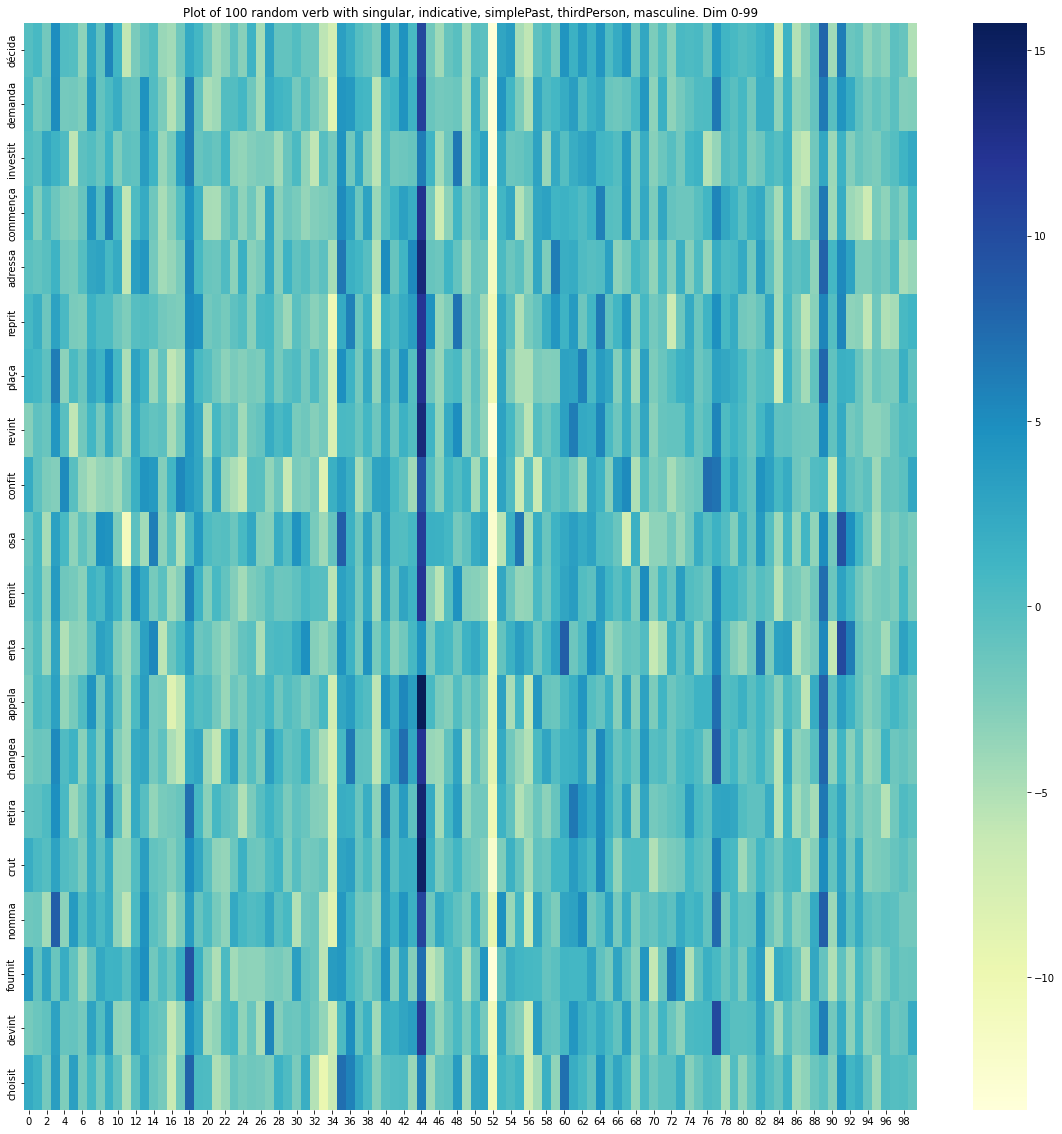

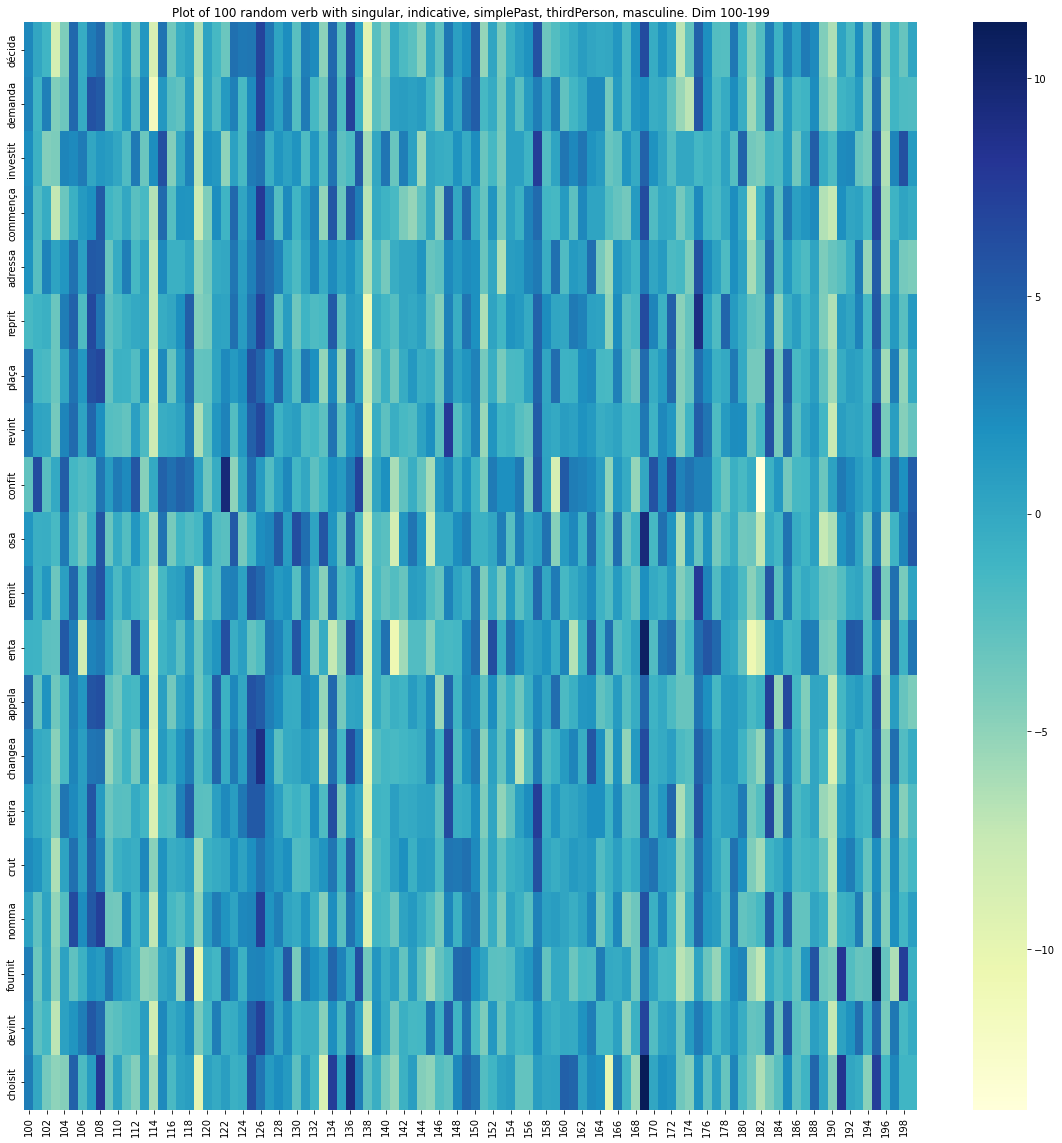

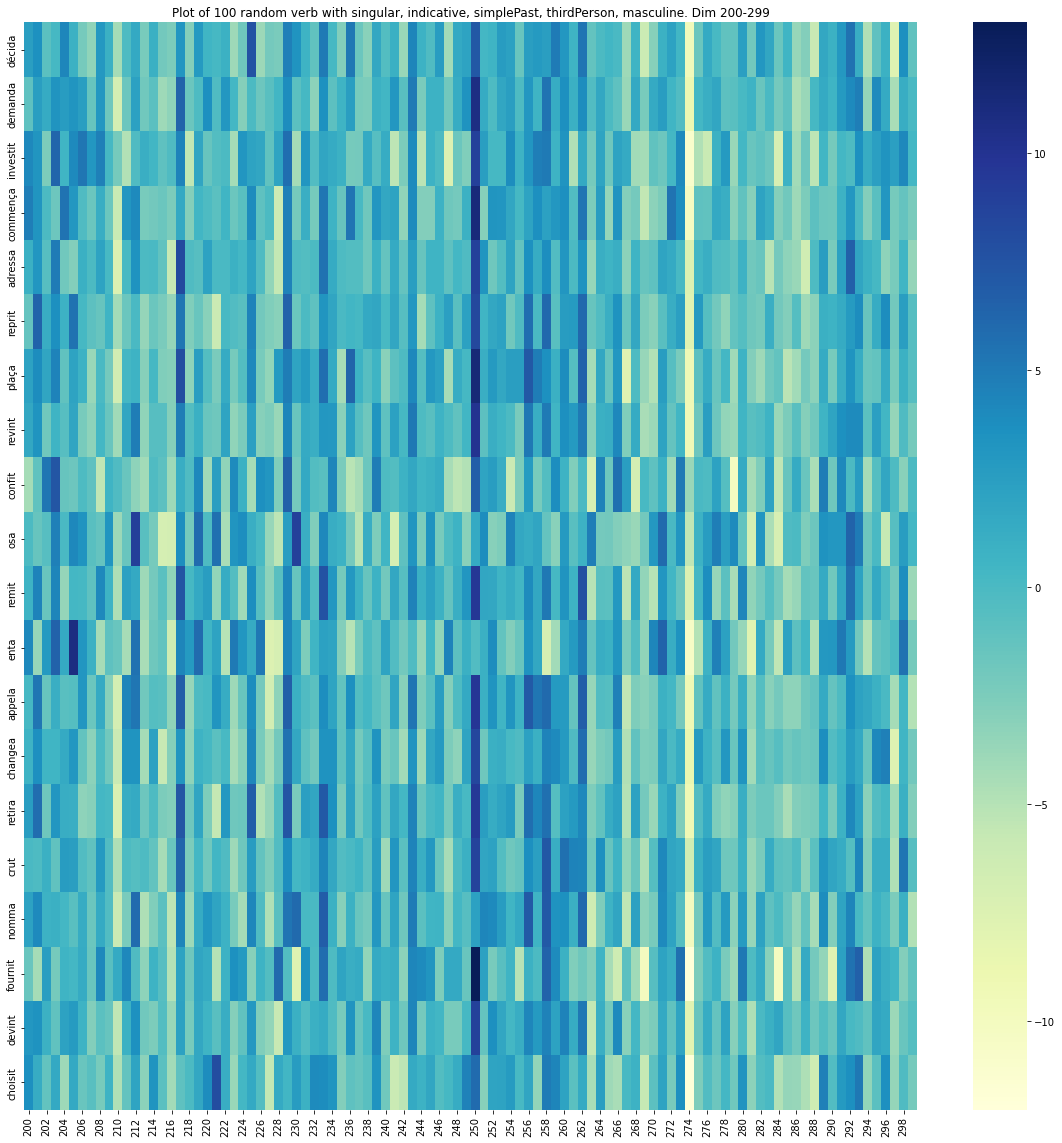

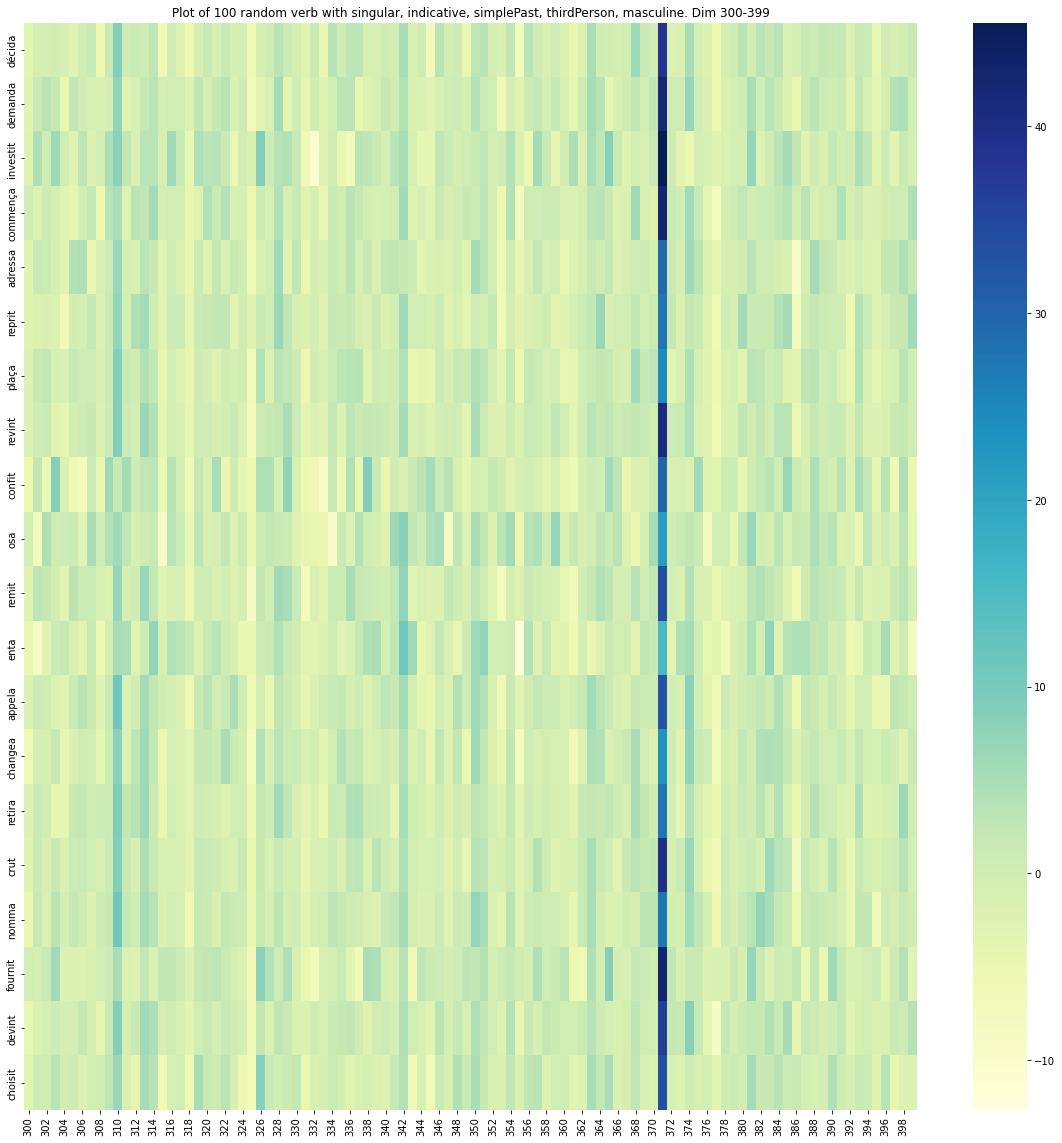

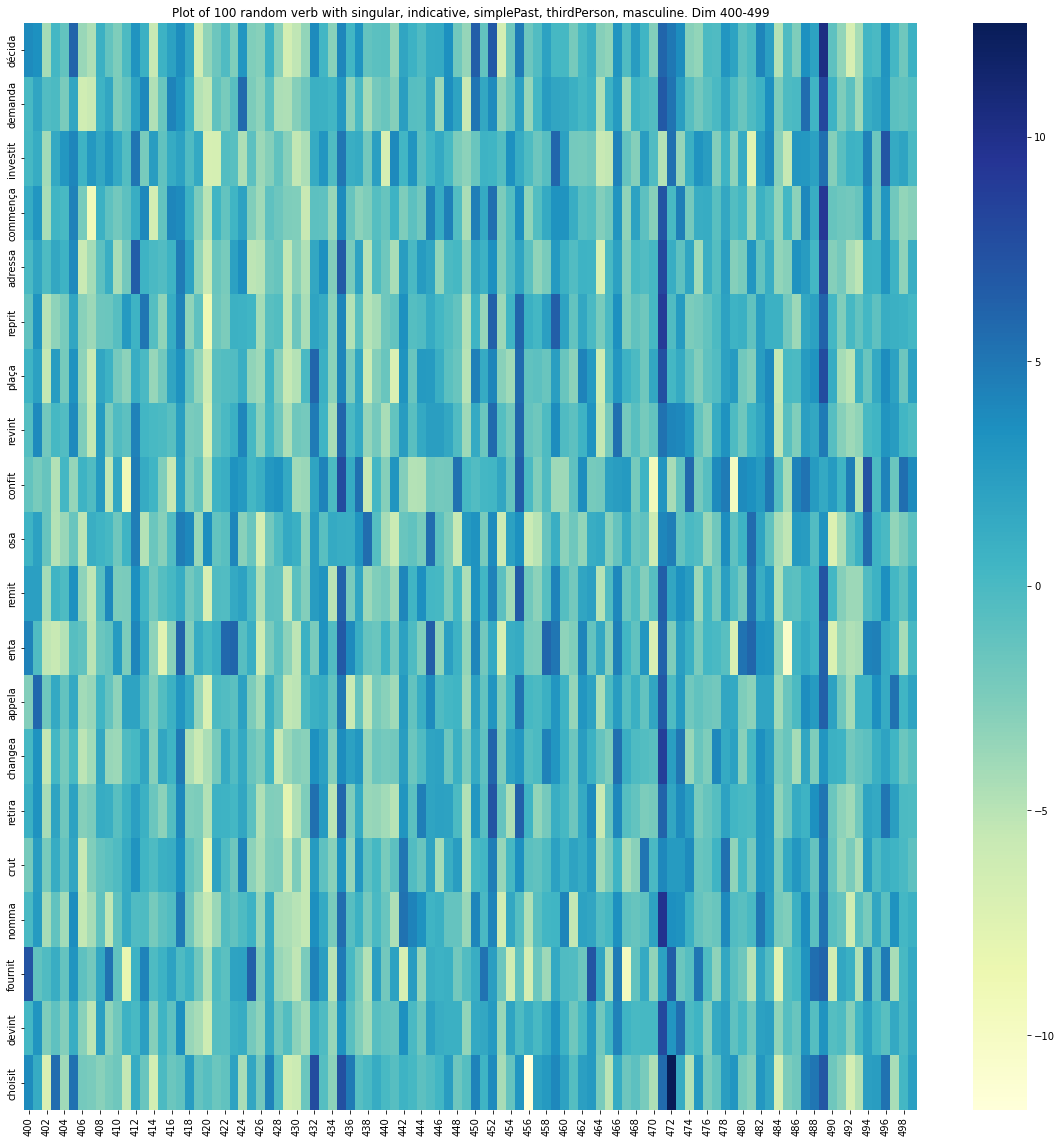

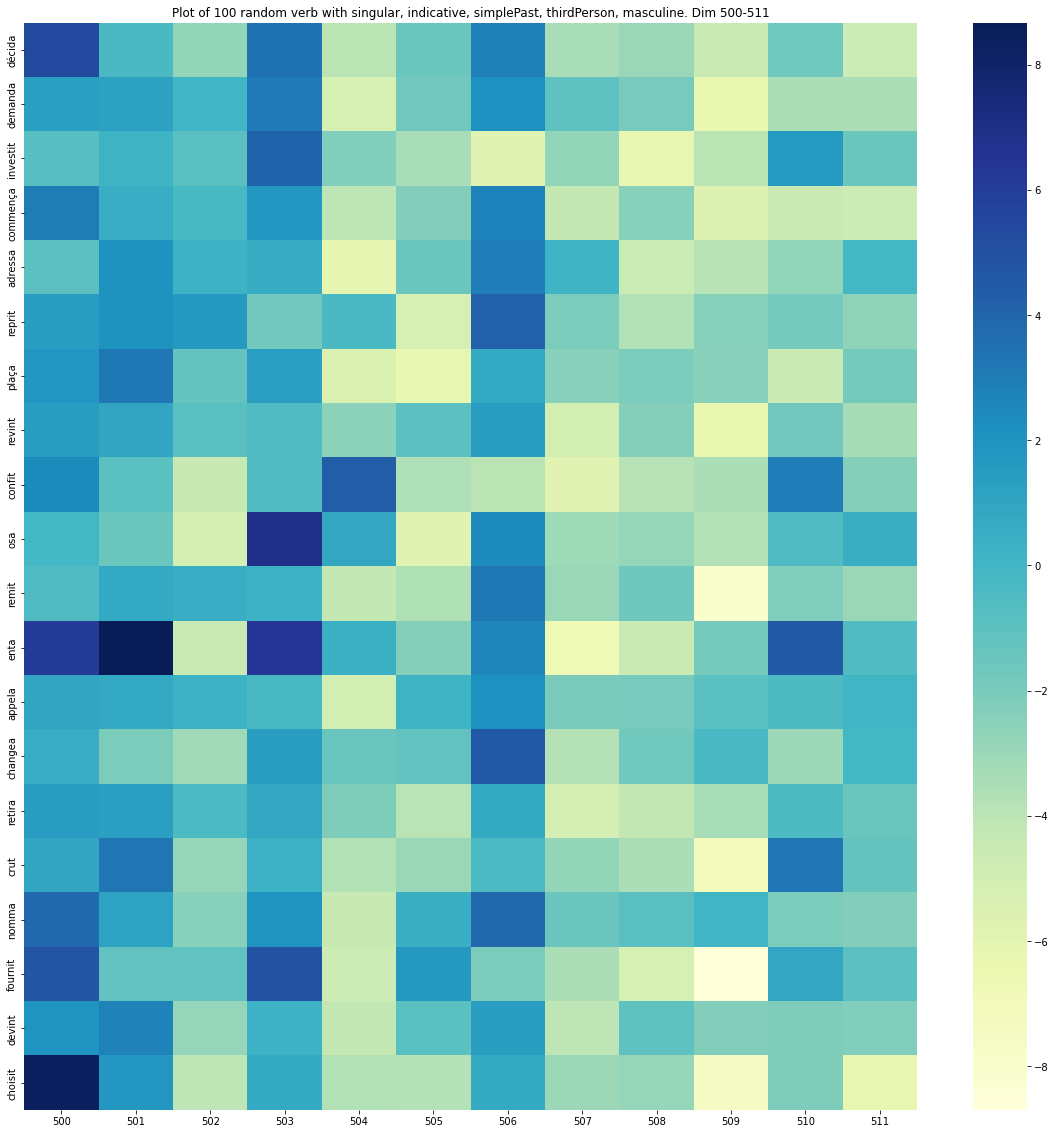

In [ ]:
plot_we_heatmap(col_1_df.sample(n=20), size=(20, 20), label = 'Plot of 100 random verb with singular, indicative, simplePast, thirdPerson, masculine')

In [38]:
verbs_we= df.iloc[:,0]
n_columns = len(df.columns)
for i in range(1, n_columns):
  a=df.iloc[:,i]
  verbs_we = pd.concat([verbs_we, a])
print(verbs_we)




0          abaisser
1          abalober
2        abalourdir
3        abandonner
4        abasourdir
            ...    
14757              
14758              
14759              
14760              
14761              
Length: 3188592, dtype: object


In [39]:
verbs_we_df = create_words_df(model, tokenizer, verbs_we, progress=True)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [40]:
verbs_we_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
abaisser,-0.747519,-0.113683,1.325009,0.911627,-1.904380,-9.002491,-1.629585,0.944770,3.187650,2.009824,...,2.685377,3.416851,-3.167169,0.655781,0.679771,-2.816759,-7.782869,-5.602723,-0.491549,-4.491615
abandonner,1.390643,2.159090,-2.062917,-1.866176,-2.612017,-6.143830,-4.830592,-0.031206,1.532932,-2.049455,...,2.740225,0.275028,0.014792,-3.817796,1.162358,-6.707489,-5.114801,-3.397800,2.333867,-4.365515
abattre,1.831470,0.906042,-1.346421,-2.178033,-1.647874,-4.480566,-2.788281,-2.075789,2.570961,-0.989937,...,-0.506417,-3.029911,-1.880436,-3.290468,-2.952549,-3.258610,-5.390528,-3.662323,-1.486962,-4.619687
abolir,0.642638,-0.279848,-2.408875,0.720843,-2.659510,-1.736096,-1.391011,0.856842,-0.086003,2.630179,...,2.001883,1.335928,0.147248,0.789997,-1.141161,-2.566548,-4.268200,-5.605224,-2.125008,-0.673525
abonner,4.842296,0.787345,-2.811515,0.931225,3.630959,-2.983525,-0.609328,-4.929424,2.715345,-3.431795,...,4.551510,1.479332,0.832494,-3.701814,3.679448,-2.403465,-6.765020,-3.323872,7.202050,0.545049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ri,-0.392870,1.035102,2.555569,-4.648828,-2.734535,-0.016542,1.948242,-5.096567,-0.430416,-2.920654,...,-0.514121,1.772056,-2.415262,-1.964800,-2.450147,-5.602681,-3.914068,-4.803717,1.754554,-1.397613
souri,1.518366,-1.673151,4.385755,-0.285692,-0.589451,-2.244247,-1.982214,-0.230587,2.276996,-2.305416,...,-3.545237,2.244371,0.904917,-3.390943,1.779433,-4.982320,-3.352296,-3.566676,-1.845987,-0.893933
suffi,3.183763,0.405156,2.462578,-0.079444,3.258432,-3.559424,-8.482520,-1.301205,3.466282,-3.398628,...,-2.408332,2.093470,-3.225399,1.424573,-1.749826,-3.106265,-2.797306,-7.580166,0.023397,-4.864722
été,3.416337,-0.773586,1.706467,-0.731092,-2.286620,-4.172236,0.249760,2.382638,-0.532814,-1.754949,...,-1.167793,1.600534,-3.600604,-3.045681,3.401185,-7.156822,-2.926211,-7.060627,4.555849,-4.830540


In [41]:
verbs_we_df.to_csv('all_verb_we.csv')